<a href="https://colab.research.google.com/github/DavidT005/CUFICO_2019_2/blob/master/TTreeExcerciseDavid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
binutils set to manually installed.
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
tar is already the newest version (1.29b-2ubuntu0.1).
The following additional packages will be installed:
  libapr1 libaprutil1 libdpkg-perl libserf-1-1 libsvn1
Suggested packages:
  debian-keyring bz

### 2. Mount the drive to get the root binary and untar it 

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb	  piano-C5.wav
Data5.root		  Random2DHistos
FFT_imagen.ipynb	  root_build_google_yikes.tar
FFT.ipynb		  TrimmedTree.root
FLUTEMI.WAV		  TTreeExcercise.ipynb


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [5]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Oct 25 16:58 sample_data
drwx------  4 root root 4.0K Nov  7 11:44 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [7]:
import ROOT

Welcome to JupyROOT 6.14/04


In [0]:
from array import array #Another library for arrays diferent from numpy

In [0]:
MyTree = ROOT.TTree( 'tree1', 'tree para un par de dados' ) #Creates a tree object with name 'tree1' and it's description

In [0]:
dado1 = array( 'i', [ 0 ] )#creates an array of type int and only a element which is 0
dado2 = array( 'i', [ 0 ] )#creates an array of type int and only a element which is 0

In [11]:
MyTree.Branch( 'dado 1', dado1, 'dado1/I' ) #Creates a branch of name 'dado 1' with the adress to variable 'dado1'. 'dado1/i' specifies it is an unsinged 32 bit int
MyTree.Branch( 'dado 2', dado2, 'dado2/I' ) #Creates a branch of name 'dado 2' with the adress to variable 'dado2'. 'dado2/i' specifies it is an unsinged 32 bit int
#The branches store information on where the variables are located in memory and can update the branche's information using it

<ROOT.TBranch object ("dado 2") at 0x2f3e800>

In [0]:
from random import randint #A library to generate pseudorandom numbers
#randint(a,b) generates an int N such that a <= N <= b

In [0]:
for i in range(1000):
  dado1[0] = randint(1,6) #overwrites the value stored in the first entry
  dado2[0] = randint(1,6) #overwrites the value stored in the first entry
  MyTree.Fill() #Adds to the branches the information of the "event" on the variables that had changed

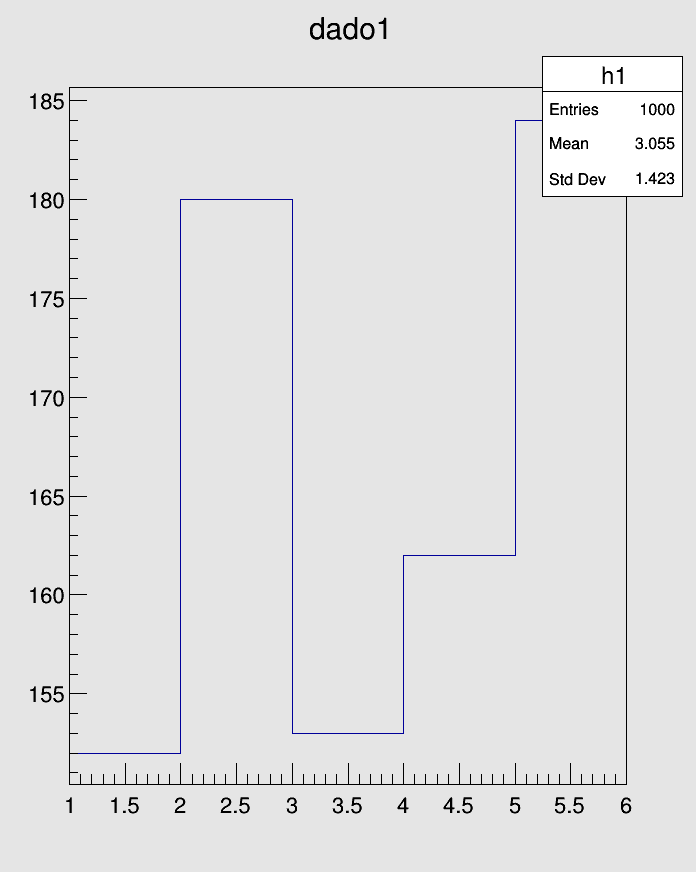

In [14]:
c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )#Creates an empty space to graph
c1.SetFillColor( 18 )#makes the background gray
MyTree.Draw("dado1>>h1(5,1,6)")#buffers an histogram of 5 bins with range from 1 to 6 using the data from dado1
c1.Update()#draws the histogram in buffer
from ROOT import gROOT#Imports a pointer that allows getting information of everything that has been created using the ROOT library
gROOT.GetListOfCanvases().Draw()#Returns info on all the canvases that have been created and then it graphs them. We have already graphed but this allows graphing in the collab

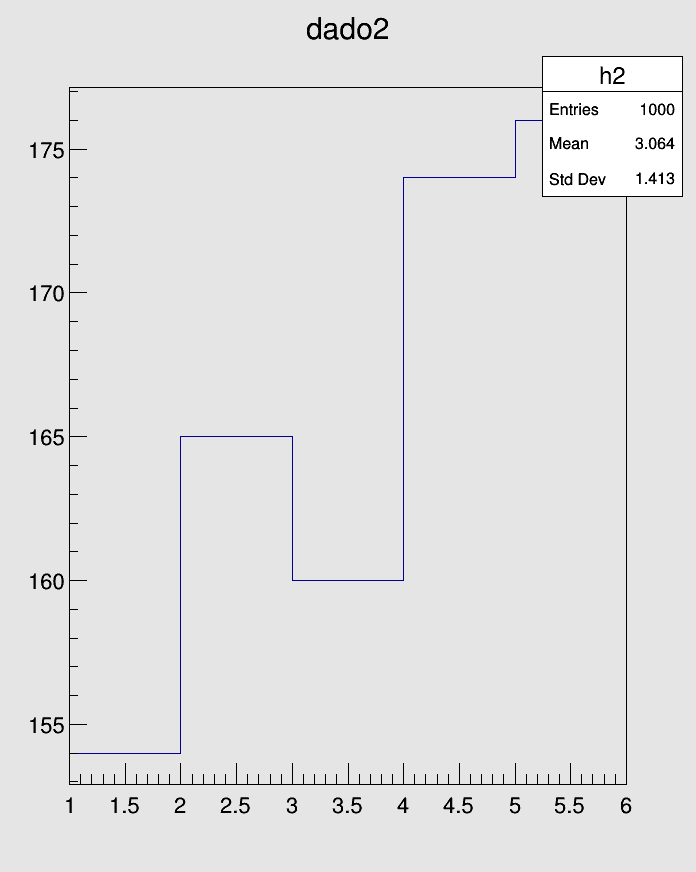

In [15]:
MyTree.Draw("dado2>>h2(5,1,6)")#buffers this histogram
c1.Update()#overwrites whats on the canvas
gROOT.GetListOfCanvases().Draw()

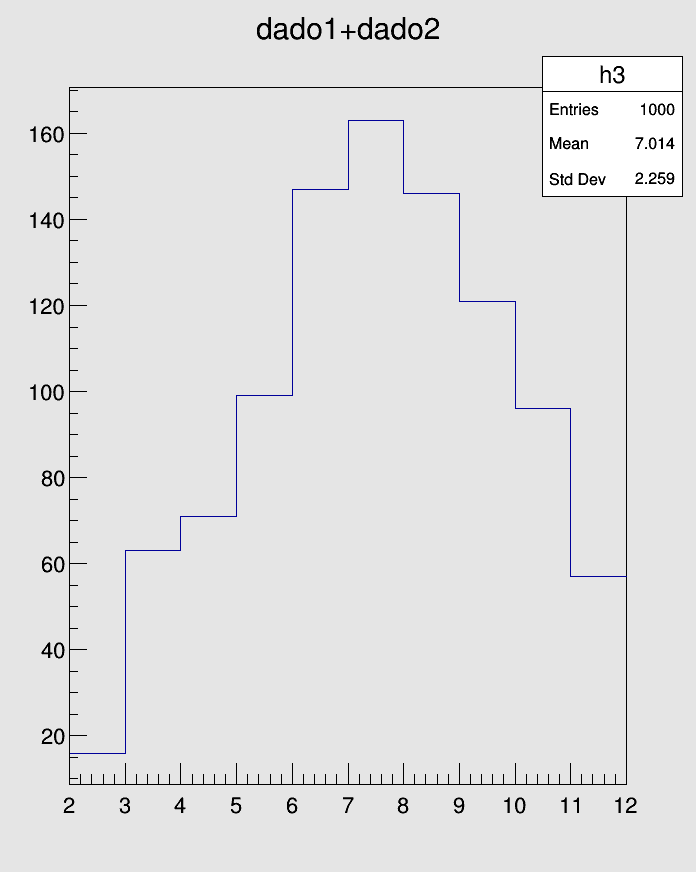

In [16]:
MyTree.Draw("dado1+dado2>>h3(10,2,12)")#adds event by event the values of dado1 and dado2 and histograms them
c1.Update()
gROOT.GetListOfCanvases().Draw()

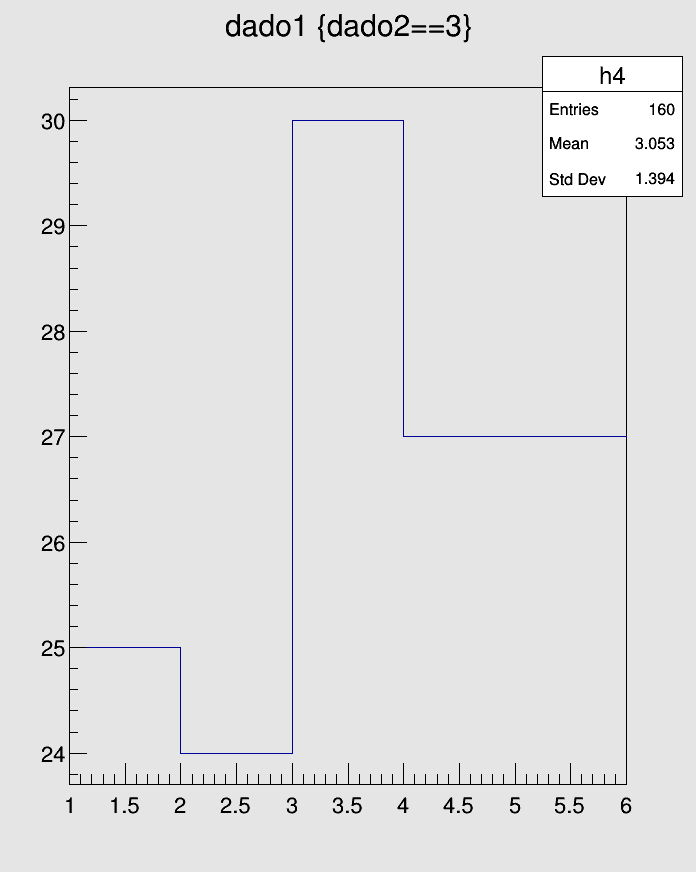

In [17]:
MyTree.Draw("dado1>>h4(5,1,6)","dado2==3")#Iterates over all the events and only graphs those where the value of dado2 was 3
c1.Update()
gROOT.GetListOfCanvases().Draw()

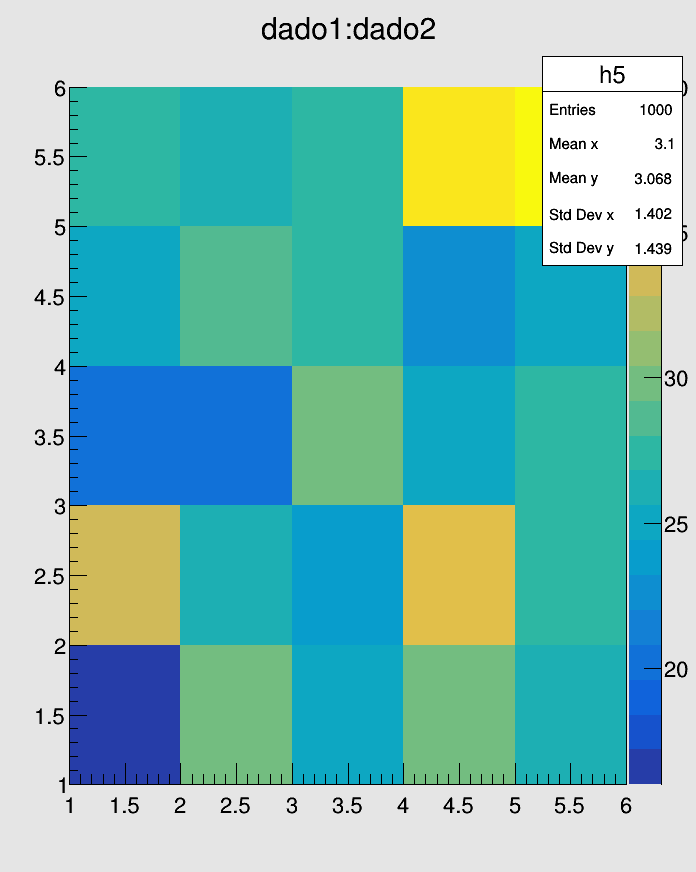

In [18]:
MyTree.Draw("dado1:dado2>>h5(5,1,6,5,1,6)","","colz")#graphs dado1's and dado2's histograms, with no condition, and with the option "colz" for a heat map
c1.Update()
gROOT.GetListOfCanvases().Draw()

#Extension to float tree

In [19]:
MyTree2 = ROOT.TTree( 'tree2', 'tree para un par de dados continuos' ) #Creates a tree object with name 'tree2' and it's description

dado12 = array( 'f', [ 0 ] )#creates an array of type float and only a element which is 0
dado22 = array( 'f', [ 0 ] )#creates an array of type float and only a element which is 0
#f allows numbers with a minimum of 4bytes in size (32 bits)

MyTree2.Branch( 'dado 12', dado12, 'dado12/F' ) #Creates a branch of name 'dado 1' with the adress to variable 'dado1'. 'dado1/i' specifies it is a 32 bit float
MyTree2.Branch( 'dado 22', dado22, 'dado22/F' ) #Creates a branch of name 'dado 2' with the adress to variable 'dado2'. 'dado2/i' specifies it is a 32 bit float
#F allows numbers with a minimum of 4bytes in size (32 bits)


<ROOT.TBranch object ("dado 22") at 0x2f3d680>

In [0]:
#from random import seed,random #A library to generate pseudorandom numbers
#seed(a) uses the number a as a seed. random() generates a random float in [0,1)
import numpy as np

In [0]:
for event in MyTree:#iterates over all the events on the tree
  np.random.seed(event.dado1) #seeds random()
  dado12[0] = 6.*np.random.random() #generates a random number in [1,6)
  np.random.seed(event.dado2) #seeds random()
  dado22[0] = 6.*np.random.random() #generates a random number in [1,6)
  MyTree2.Fill()

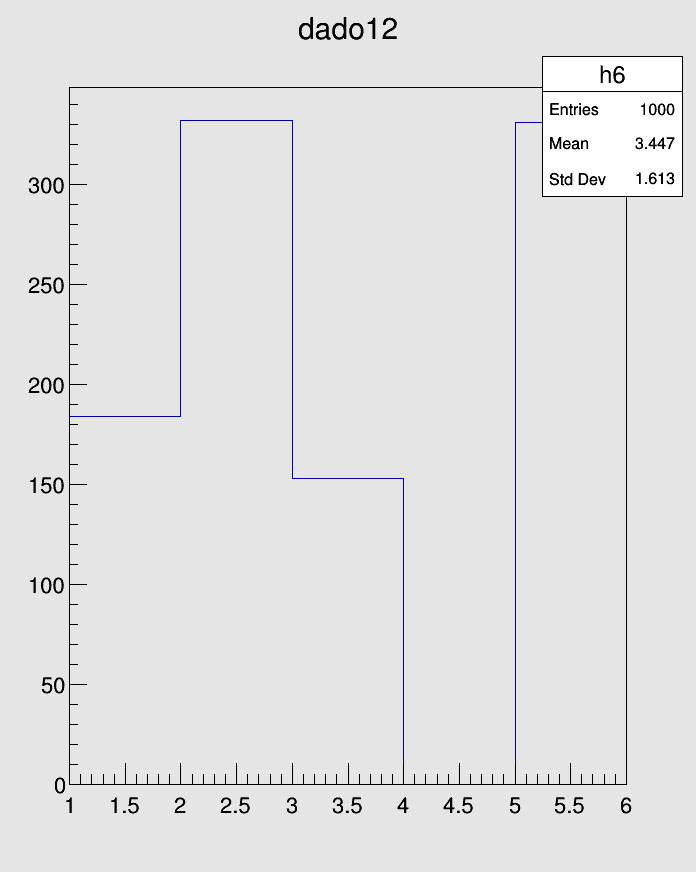

In [22]:
MyTree2.Draw("dado12>>h6(5,1,6)")#buffers an histogram of 5 bins with range from 1 to 6 using the data from dado1
c1.Update()#draws the histogram in buffer
from ROOT import gROOT#Imports a pointer that allows getting information of everything that has been created using the ROOT library
gROOT.GetListOfCanvases().Draw()#Returns info on all the canvases that have been created and then it graphs them. We have already graphed but this allows graphing in the collab

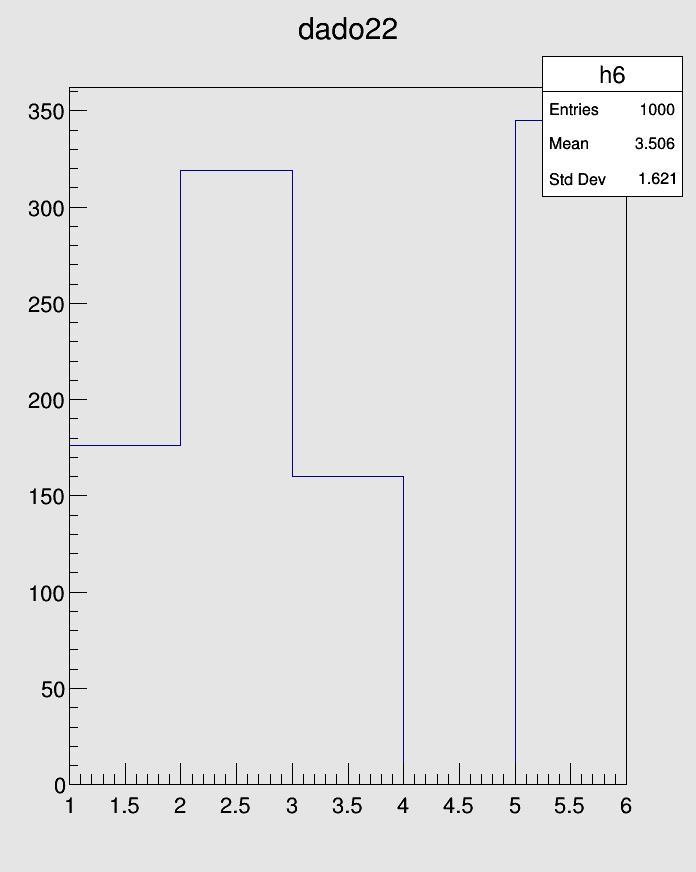

In [23]:
MyTree2.Draw("dado22>>h6(5,1,6)")#buffers an histogram of 5 bins with range from 1 to 6 using the data from dado1
c1.Update()#draws the histogram in buffer
from ROOT import gROOT#Imports a pointer that allows getting information of everything that has been created using the ROOT library
gROOT.GetListOfCanvases().Draw()#Returns info on all the canvases that have been created and then it graphs them. We have already graphed but this allows graphing in the collab

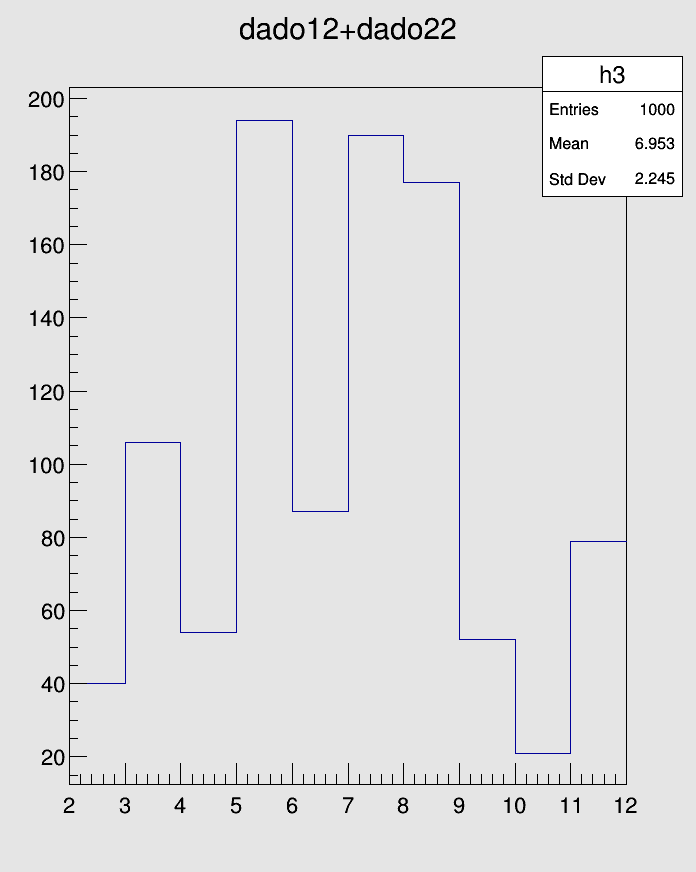

In [24]:
MyTree2.Draw("dado12+dado22>>h3(10,2,12)")#adds event by event the values of dado1 and dado2 and histograms them
c1.Update()
gROOT.GetListOfCanvases().Draw()

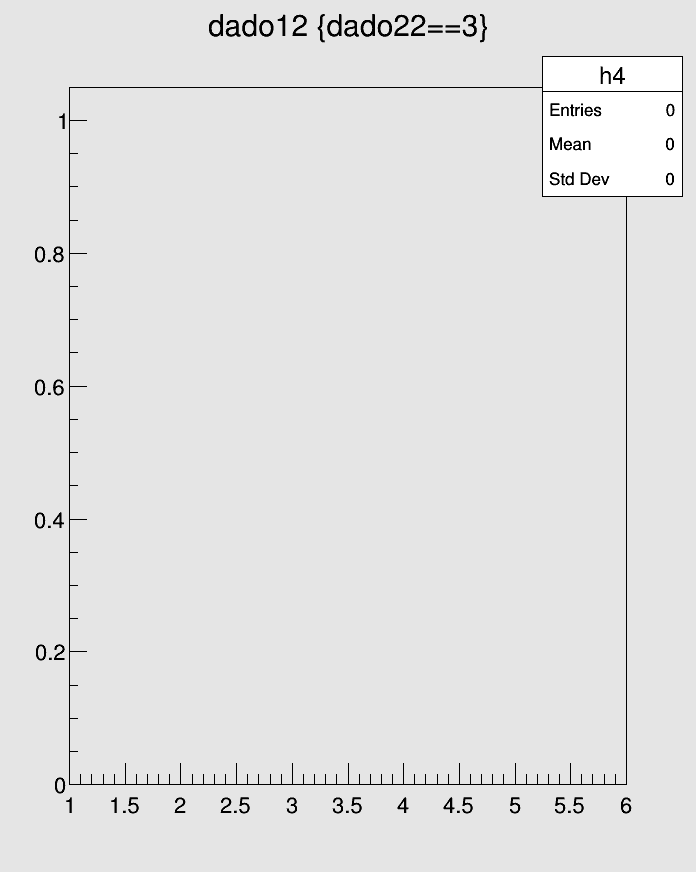

In [25]:
'''
ERROR
'''

MyTree2.Draw("dado12>>h4(5,1,6)","dado22=<3.5")#Iterates over all the events and only graphs those where the value of dado2 was 3
c1.Update()
gROOT.GetListOfCanvases().Draw()

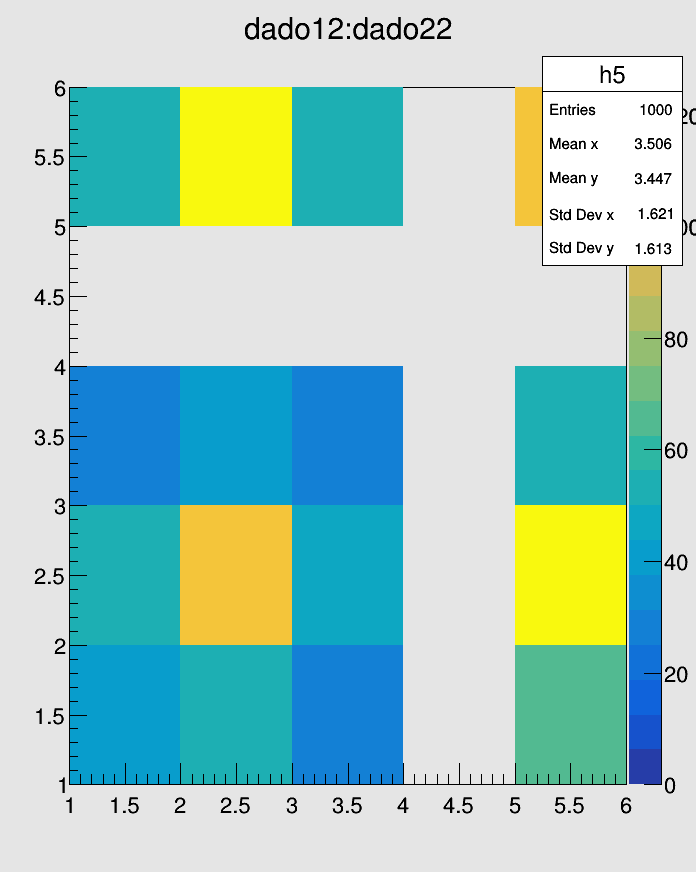

In [26]:
MyTree2.Draw("dado12:dado22>>h5(5,1,6,5,1,6)","","colz")#graphs dado1's and dado2's histograms, with no condition, and with the option "colz" for a heat map
c1.Update()
gROOT.GetListOfCanvases().Draw()